# Spring's constant measuring

## Importing libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import os
import math
from functools import reduce

from modules import LinearRegression

## Load data

The following code creates a table (dict) with entries that have:
- as key, the name of the file from which the data is read
- as value, the DataFrame returned by pandas when reading that file

Getting data from this table involves using the file from which the data is read as key and then parsing the columns of the corresponding DataFrame.

e.g.:

```
masses_measurements = datasets['misure_masse']
used_objects = masses_measurements[masses_measurements.columns[0]]
masses = masses_measurements[masses_measurements.columns[1]]
```

In [10]:
# collect filenames of exported data

data_dir = "./data"

csv_data = []
excel_data = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        current_file_path = os.path.join(root, file).replace(
            "\\", "/"
        )  # fix the unbearably frustrating flaws of the wanna-be OS... "Windows"
        if "xlsx" in file:
            excel_data.append(current_file_path)
        elif "csv" in file:
            csv_data.append(current_file_path)
    break  # stop at first recursion level: only ./data

print(f"CSV:\n{csv_data}\nEXCEL:\n{excel_data}")

CSV:
['./data/sonar_non-pretensionata_statico.csv', './data/sonar_non-pretensionata_dinamico.csv', './data/sonar_pretensionata_dinamico.csv', './data/sonar_pretensionata_statico.csv']
EXCEL:
['./data/misure_masse.xlsx', './data/calibro_non-pretensionata_statico.xlsx', './data/masse_sonar_non-pretensionata_statico.xlsx', './data/calibro_pretensionata_statico.xlsx', './data/masse_sonar_non-pretensionata_dinamico.xlsx', './data/masse_sonar_pretensionata_dinamico.xlsx', './data/masse_sonar_pretensionata_statico.xlsx']


In [11]:
def read_csv(filename: str):
    data = pd.read_csv(filename, sep=";").replace(",", ".", regex=True)

    data.dropna(inplace=True)
    data.drop(
        index=data.index[0], axis=0, inplace=True
    )  # instrument error causes first value to be nonsensical

    for col in data.columns:
        data[col] = data[col].apply(pd.to_numeric)

    return data


def read_excel(filename: str):
    data = pd.read_excel(filename)
    return data


datasets = dict()

for file in csv_data + excel_data:
    key = os.path.basename(file).split(".")[0]
    if "csv" in file:
        datasets[key] = read_csv(file)
    elif "xlsx" in file:
        datasets[key] = read_excel(file)

print(datasets.keys())

for k in datasets.keys():
    print(f"\nkey: {k}")
    datasets[k].info()

dict_keys(['sonar_non-pretensionata_statico', 'sonar_non-pretensionata_dinamico', 'sonar_pretensionata_dinamico', 'sonar_pretensionata_statico', 'misure_masse', 'calibro_non-pretensionata_statico', 'masse_sonar_non-pretensionata_statico', 'calibro_pretensionata_statico', 'masse_sonar_non-pretensionata_dinamico', 'masse_sonar_pretensionata_dinamico', 'masse_sonar_pretensionata_statico'])

key: sonar_non-pretensionata_statico
<class 'pandas.core.frame.DataFrame'>
Index: 1027 entries, 1 to 1027
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position (mm) Run #1  1027 non-null   float64
 1   Position (mm) Run #2  1027 non-null   float64
 2   Position (mm) Run #3  1027 non-null   float64
 3   Position (mm) Run #4  1027 non-null   float64
 4   Position (mm) Run #5  1027 non-null   float64
 5   Position (mm) Run #6  1027 non-null   float64
dtypes: float64(6)
memory usage: 56.2 KB

key: sonar_non-preten

## Analyze data

For the **static method**, the sonar's signal is hypothesized to have a very small amplitude, so the measure of the mass' displacement is the mean of the recorded positions.<BR><BR>
For the **dynamic method**, we isolate the peaks of the oscillating signal and compute the mean of the period between two adjacent peaks. From there, the resulting period is used to approximate the frequency of the oscillation.

In [ ]:
def lin_reg(x: list, y: list, x_errs: list, y_errs: list):
    # y = Ax + B
    sum_x_2 = 0
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_1_sigma_y = 0
    N = len(x)

    for i in range(N):
        sum_x += x[i]
        sum_x_2 += (x[i]*x[i])
        sum_y += y[i]
        sum_xy += (x[i]*y[i])
        sum_1_sigma_y += (y_errs[i]*y_errs[i] + )
    
    delta = N * sum_x_2 - (sum_x * sum_x)
    A = (1/delta) * (sum_x_2 * sum_y - sum_x * sum_xy)
    B = (1/delta) * (N * sum_xy - sum_x * sum_y)
    sigma_y_2 = 

In [12]:
# sampling frequencies in Hz

static_sampling_frequency = 100
dynamic_sampling_frequency = 200

In [13]:
static_keys = list(filter(lambda k: "statico" in k, datasets.keys()))
dynamic_keys = list(filter(lambda k: "dinamico" in k, datasets.keys()))

print(f"{static_keys}\n{dynamic_keys}")

static_datasets = {k: datasets[k] for k in static_keys}
dynamic_datasets = {k: datasets[k] for k in dynamic_keys}

['sonar_non-pretensionata_statico', 'sonar_pretensionata_statico', 'calibro_non-pretensionata_statico', 'masse_sonar_non-pretensionata_statico', 'calibro_pretensionata_statico', 'masse_sonar_pretensionata_statico']
['sonar_non-pretensionata_dinamico', 'sonar_pretensionata_dinamico', 'masse_sonar_non-pretensionata_dinamico', 'masse_sonar_pretensionata_dinamico']


In [14]:
object_masses = dict()
ds = datasets["misure_masse"]
objects = [str(e) for e in ds.iloc[:,0].array.tolist()]
masses = ds.iloc[:,1].array.tolist()

for i in range(len(objects)):
    object_masses[objects[i]] = masses[i]
print(object_masses)

del objects
del masses
del ds


# inc_masses = np.zeros(10)
# inc_masses[0] = object_masses["massa [g]"][2] + object_masses["massa [g]"][3]
# for i in range(0, 9):
    # inc_masses[i + 1] = inc_masses[i] + object_masses["massa [g]"][i + 4]


def calculate_total_mass(used_masses: str, spring_used: str, has_support_structure: bool = True):
    total_mass = object_masses[spring_used]
    if has_support_structure:
        total_mass += object_masses['piatto'] + object_masses['supporto']

    if not isinstance(used_masses, str):
        return total_mass

    for m in [s for s in used_masses.split(',') if s]:
        if m in object_masses.keys():
            total_mass += object_masses[m]
        else:
            continue

    return total_mass

print(f"testing with 1,2,4,5 (and support structure): {calculate_total_mass('1,,2,4,,5', 'molla pretensionata')}") # it works, noice

{'molla pretensionata': 24.98, 'molla non pretensionata': 15.46, 'piatto': 8.28, 'supporto': 19.87, '1': 19.54, '2': 19.63, '3': 19.86, '4': 20.13, '5': 19.99, '6': 19.66, '7': 19.91, '8': 19.99, '9': 20.01}
testing with 1,2,4,5 (and support structure): 132.42


### Static method

In [15]:
def analyze_calibre_data(dataset_name: str):
    used_spring = 'molla ' + list(filter(lambda e: 'pretensionata' in e, dataset_name.split('_')))[0].replace('-', ' ') # ugly as hell solution
    used_masses = static_datasets[dataset_name].iloc[:, 0].array.tolist()
    mm_lengths = static_datasets[dataset_name].iloc[:, 1].array.tolist()
    in_lengths = static_datasets[dataset_name].iloc[:, 2].array.tolist()
    print(f"\nCALIBRE dataset: {dataset_name}\nspring: {used_spring}\nmasses: {used_masses}\nmm: {mm_lengths}\nin: {in_lengths}")

    results = np.ndarray((len(used_masses), 4))

    for i in range(len(used_masses)):
        results[i] = [calculate_total_mass(used_masses[i], used_spring), mm_lengths[i], 0.5, 0.5]
    
    print(results, end='\n------------\n')
    return results



def analyze_sonar_data(dataset_name: str):
    runs = static_datasets[dataset_name]
    used_masses = static_datasets["masse_" + dataset_name].iloc[:, 0].array.tolist()
    used_spring = 'molla ' + list(filter(lambda e: 'pretensionata' in e, dataset_name.split('_')))[0].replace('-', ' ') # ugly as hell solution
    print(f"\nSONAR dataset: {dataset_name}\nmasses: {used_masses}\nspring: {used_spring}")

    results = np.ndarray((len(runs.columns),4))

    i = 0
    for run_name in runs.columns:
        # print(runs[run_name].array)
        signal = runs[run_name]
        results[i] = [calculate_total_mass(used_masses[i], used_spring), np.mean(signal), 0.5, 0.5]
        i += 1
    
    print(results, end='\n------------\n')
    return results



# TODO: store analyzed results and calculate linear regression

def analyze_dataset(dataset_name: str):
    if 'calibro' in dataset_name:
        return analyze_calibre_data(dataset_name)
    elif 'sonar' in dataset_name:
        return analyze_sonar_data(dataset_name)



final_static_data = dict()

for key in filter(lambda e: not 'masse' in e, static_datasets.keys()):
    final_static_data[key] = analyze_dataset(key)

print(f"\n~~~\n{final_static_data}\n~~~\n")


SONAR dataset: sonar_non-pretensionata_statico
masses: [nan, '1,', '1,2', '1,2,3', '1,2,3,4', '1,2,3,4,5']
spring: molla non pretensionata
[[ 4.36100000e+01 -4.50340798e-02  5.00000000e-01  5.00000000e-01]
 [ 6.31500000e+01 -6.20304771e+01  5.00000000e-01  5.00000000e-01]
 [ 8.27800000e+01 -1.23295346e+02  5.00000000e-01  5.00000000e-01]
 [ 1.02640000e+02 -1.85961646e+02  5.00000000e-01  5.00000000e-01]
 [ 1.22770000e+02 -2.48528403e+02  5.00000000e-01  5.00000000e-01]
 [ 1.42760000e+02 -3.11495940e+02  5.00000000e-01  5.00000000e-01]]
------------

SONAR dataset: sonar_pretensionata_statico
masses: ['1,2,3', '1,2,3,4', '1,2,3,4,5', '1,2,3,4,5,6', '1,2,3,4,5,6,7', '1,2,3,4,5,6,7,8', '1,2,3,4,5,6,7,8,9']
spring: molla pretensionata
[[ 1.12160000e+02  1.92896016e-01  5.00000000e-01  5.00000000e-01]
 [ 1.32290000e+02 -1.27056851e+01  5.00000000e-01  5.00000000e-01]
 [ 1.52280000e+02 -2.57116812e+01  5.00000000e-01  5.00000000e-01]
 [ 1.71940000e+02 -3.83418465e+01  5.00000000e-01  5.0000

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

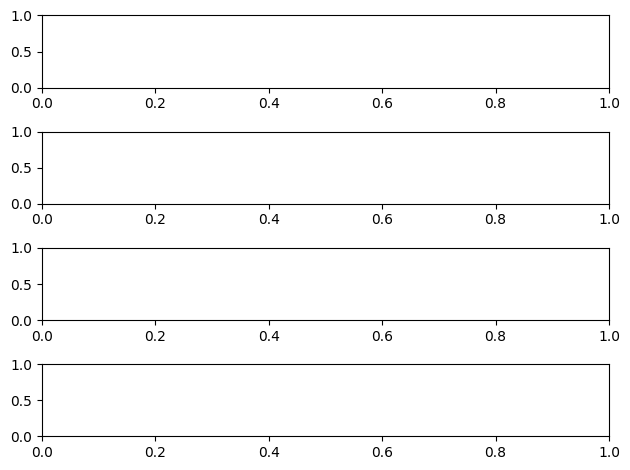

In [16]:
# k_test and linear regression

data_points = final_static_data['sonar_non-pretensionata_statico']
k_test = (data_points[-1,1] - data_points[0,1]) / (data_points[-1,0] - data_points[0,0])

fig, axs = plt.subplots(4)
fig.tight_layout()

i = 0
for k in final_static_data:
    plot_data = final_static_data[k]

    linreg = LinearRegression(plot_data[:,0], plot_data[:,1], plot_data[:,2], plot_data[:,3], k_test)
    linreg_points = [
        # y = mx + q
        linreg['Coefficient'] * plot_data[0,0] + linreg['Intercept'],
        linreg['Coefficient'] * plot_data[-1,0] + linreg['Intercept'],
    ]

    axs[i].set_xlabel("Mass [g]")
    axs[i].set_ylabel("H [mm]")
    axs[i].errorbar(plot_data[:,0], plot_data[:,1], plot_data[:,2], plot_data[:,3], c='g', ls='-')
    axs[i].plot([plot_data[0,0], plot_data[-1,0]], linreg_points)
    
    # if final_static_data[k].shape[1] == 3:
        # ax2 = axs[i].twinx()
        # ax2.set_ylabel("H [in]")
        # ax2.scatter(final_static_data[k][:,0], final_static_data[k][:,2], c='r', ls='--')

    i += 1


In [ ]:
# Analyze static method

averages = np.zeros(7)
for run in range(7):
    averages[run] += np.mean(
        datasets["sonar_pretensionata_statico"][f"Position (mm) Run #{run+1}"]
    )

averages = np.round_(averages, decimals=2)
print(averages)

k = 9.81 * (inc_masses[-1] - inc_masses[3]) / (averages[-1] - averages[0])
print(k)

### Dynamic method

In [ ]:
# Analyze dynamic method


def discrete_derivative(domain: list, curve: list):
    d = [0]
    for i in range(1, len(curve)):
        d.append((curve[i] - curve[i - 1]) / (domain[i] - domain[i - 1]))
    return d


# windowed peaks isolation
def windowed_peaks(signal: list):
    peaks = []
    for i in range(2, len(signal) - 2, 4):
        if (
            reduce(
                lambda x, y: x * y,
                discrete_derivative(list(range(i - 2, i + 3)), signal[i - 2 : i + 3]),
            )
            < 0
        ):
            peaks.append(max(signal[i - 2 : i + 3]))
    return peaks

In [ ]:
def calculate_mean_period(column_id: str):
    wf = data[column_id].array
    for v in wf:
        print(windowed_peaks(wf))


# calculate_mean_period(data[data.columns[0]])

# for col in data.columns:
# calculate_mean_period(col)